In [44]:
from google.colab import auth
auth.authenticate_user()

In [45]:
!pip install pyspark
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean
import pyspark.sql.functions as F
from pyspark.sql import SparkSession
from pyspark.sql.functions import when
from pyspark.sql.functions import col,to_date
from pyspark.sql.functions import split
import urllib.request



In [46]:
from pyspark.sql.types import StructType,StructField,StringType,DataType,FloatType,DoubleType

# Define the schema
schema = StructType([
    StructField("index", DoubleType(), True),
    StructField("Data", StringType(), True),
    StructField("Hora", StringType(), True),
    StructField("PRECIPITACAO_TOTAL_HORARIA_mm", DoubleType(), True),
    StructField("PRESSAO_ATMOSFERICA_NIVEL_ESTACAO_HORARIA_mb", DoubleType(), True),
    StructField("PRESSAO_ATMOSFERICA_MAX_ANT_AUT_mb", DoubleType(), True),
    StructField("PRESSAO_ATMOSFERICA_MIN_ANT_AUT_mb", DoubleType(), True),
    StructField("RADIACAO_GLOBAL_Kj_per_m2", DoubleType(), True),
    StructField("TEMPERATURA_AR_BULBO_SECO_HORARIA_C", DoubleType(), True),
    StructField("TEMPERATURA_PONTO_ORVALHO_C", DoubleType(), True),
    StructField("TEMPERATURA_MAX_ANT_AUT_C", DoubleType(), True),
    StructField("TEMPERATURA_MIN_ANT_AUT_C", DoubleType(), True),
    StructField("TEMPERATURA_ORVALHO_MAX_ANT_AUT_C", DoubleType(), True),
    StructField("TEMPERATURA_ORVALHO_MIN_ANT_AUT_C", DoubleType(), True),
    StructField("UMIDADE_REL_MAX_ANT_AUT_percent", DoubleType(), True),
    StructField("UMIDADE_REL_MIN_ANT_AUT_percent", DoubleType(), True),
    StructField("UMIDADE_RELATIVA_AR_HORARIA_percent", DoubleType(), True),
    StructField("VENTO_DIRECAO_HORARIA_gr_deg", DoubleType(), True),
    StructField("VENTO_RAJADA_MAX_m_s", DoubleType(), True),
    StructField("VENTO_VELOCIDADE_HORARIA_m_s", DoubleType(), True),
    StructField("region", StringType(), True),
    StructField("state", StringType(), True),
    StructField("station", StringType(), True),
    StructField("station_code", StringType(), True),
    StructField("latitude", DoubleType(), True),
    StructField("longitude", DoubleType(), True),
    StructField("height", DoubleType(), True)
    ])



In [47]:
# spark = SparkSession.builder.appName("finalproject").getOrCreate()
spark = SparkSession.builder.appName("finalproject").config("spark.jars", "gs://spark-lib/bigquery/spark-bigquery-latest_2.12.jar").config("spark.jars", "https://storage.googleapis.com/hadoop-lib/gcs/gcs-connector-hadoop3-latest.jar").getOrCreate()


In [ ]:
"wget<gs://bdat1002_bucket/southeast.csv>"

'wget<gs://bdat1002_bucket/southeast.csv>'

In [ ]:
import pandas as pd
from pyspark.sql import SparkSession

# URL of the CSV file
url = 'https://storage.googleapis.com/bdat1002_bucket/southeast2.csv'

# Local path to save the downloaded file
local_path = '/Users/elsiedumashie/Downloads/archive/north.csv'

# Download the file using pandas
df_pandas = pd.read_csv(url)
df_pandas.to_csv(local_path, index=False)

# Initialize Spark session
spark = SparkSession.builder.appName('YourAppName').getOrCreate()

# Read the CSV file with PySpark
southeast_df = spark.read.csv(local_path, schema=schema, header=True, sep=',')

# Show the first few rows of the DataFrame
southeast_df.show(5)


In [48]:
gcs_path ='gs://bdat1002_bucket/southeast.csv'
southeast_df =spark.read.csv(gcs_path, schema=schema, header= True, sep=',')
southeast_df.show(5)


+-----+----------+-----+-----------------------------+--------------------------------------------+----------------------------------+----------------------------------+-------------------------+-----------------------------------+---------------------------+-------------------------+-------------------------+---------------------------------+---------------------------------+-------------------------------+-------------------------------+-----------------------------------+----------------------------+--------------------+----------------------------+------+-----+-----------------+------------+--------+------------+------+
|index|      Data| Hora|PRECIPITACAO_TOTAL_HORARIA_mm|PRESSAO_ATMOSFERICA_NIVEL_ESTACAO_HORARIA_mb|PRESSAO_ATMOSFERICA_MAX_ANT_AUT_mb|PRESSAO_ATMOSFERICA_MIN_ANT_AUT_mb|RADIACAO_GLOBAL_Kj_per_m2|TEMPERATURA_AR_BULBO_SECO_HORARIA_C|TEMPERATURA_PONTO_ORVALHO_C|TEMPERATURA_MAX_ANT_AUT_C|TEMPERATURA_MIN_ANT_AUT_C|TEMPERATURA_ORVALHO_MAX_ANT_AUT_C|TEMPERATURA_ORVALHO_MIN

In [ ]:
#Utilize Spark for processing and analyzing the cleaned data. This should involve complex queries and data transformations

from pyspark.sql.functions import col, avg, sum
 #calculate aggregations
from pyspark.sql import SparkSession
from pyspark.sql.functions import mean, max, min, count

# Initialize Spark session
spark = SparkSession.builder.appName('AggregationExample').getOrCreate()

# Aggregations by region
region_aggregations = southeast_df.groupBy('region').agg(
    mean('TEMPERATURA_AR_BULBO_SECO_HORARIA_C').alias('avg_temperature'),
    max('VENTO_VELOCIDADE_HORARIA_m_s').alias('max_wind_speed'),
    min('UMIDADE_RELATIVA_AR_HORARIA_percent').alias('min_relative_humidity'),
    count('*').alias('record_count')
)

# Aggregations by state
state_aggregations = southeast_df.groupBy('state').agg(
    mean('PRECIPITACAO_TOTAL_HORARIA_mm').alias('avg_precipitation'),
    max('TEMPERATURA_MAX_ANT_AUT_C').alias('max_temperature'),
    min('TEMPERATURA_MIN_ANT_AUT_C').alias('min_temperature'),
    count('*').alias('record_count')
)

# Aggregations by station
station_aggregations = southeast_df.groupBy('station').agg(
    mean('RADIACAO_GLOBAL_Kj_per_m2').alias('avg_radiation'),
    max('PRESSAO_ATMOSFERICA_NIVEL_ESTACAO_HORARIA_mb').alias('max_pressure'),
    min('PRESSAO_ATMOSFERICA_MIN_ANT_AUT_mb').alias('min_pressure'),
    count('*').alias('record_count')
)

# Show the aggregated results
region_aggregations.show()
state_aggregations.show()
station_aggregations.show()




+------+------------------+--------------+---------------------+------------+
|region|   avg_temperature|max_wind_speed|min_relative_humidity|record_count|
+------+------------------+--------------+---------------------+------------+
|    SE|-651.4797423900707|          24.0|              -9999.0|    15345216|
+------+------------------+--------------+---------------------+------------+

+-----+-------------------+---------------+---------------+------------+
|state|  avg_precipitation|max_temperature|min_temperature|record_count|
+-----+-------------------+---------------+---------------+------------+
|   SP|-1357.5488120021912|           44.3|        -9999.0|     4288560|
|   ES| -813.4256416603938|           45.0|        -9999.0|     1211856|
|   MG| -601.9915445858327|           45.0|        -9999.0|     7350864|
|   RJ|  -805.433130601585|           42.4|        -9999.0|     2493936|
+-----+-------------------+---------------+---------------+------------+

+-----------------+-----

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_date, year



# Converted the 'Data' column to a timestamp type
southeast_df = southeast_df.withColumn('Data', to_date(col('Data'), 'yyyy-MM-dd'))

# Extract the year from the 'Data' column
southeast_df = southeast_df.withColumn('Year', year('Data'))

# Show the DataFrame with the new 'Year' column
southeast_df.show()



+-----+----------+-----+-----------------------------+--------------------------------------------+----------------------------------+----------------------------------+-------------------------+-----------------------------------+---------------------------+-------------------------+-------------------------+---------------------------------+---------------------------------+-------------------------------+-------------------------------+-----------------------------------+----------------------------+--------------------+----------------------------+------+-----+-----------------+------------+--------+------------+------+----+
|index|      Data| Hora|PRECIPITACAO_TOTAL_HORARIA_mm|PRESSAO_ATMOSFERICA_NIVEL_ESTACAO_HORARIA_mb|PRESSAO_ATMOSFERICA_MAX_ANT_AUT_mb|PRESSAO_ATMOSFERICA_MIN_ANT_AUT_mb|RADIACAO_GLOBAL_Kj_per_m2|TEMPERATURA_AR_BULBO_SECO_HORARIA_C|TEMPERATURA_PONTO_ORVALHO_C|TEMPERATURA_MAX_ANT_AUT_C|TEMPERATURA_MIN_ANT_AUT_C|TEMPERATURA_ORVALHO_MAX_ANT_AUT_C|TEMPERATURA_ORVALH

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg
# columns for which you want to calculate averages
columns_to_average = ['PRECIPITACAO_TOTAL_HORARIA_mm', 'TEMPERATURA_AR_BULBO_SECO_HORARIA_C', 'UMIDADE_RELATIVA_AR_HORARIA_percent']

# Calculate averages
averages_df = southeast_df.agg({col: 'avg' for col in columns_to_average})

# Show the calculated averages
averages_df.show()



+----------------------------------------+----------------------------------+----------------------------------------+
|avg(TEMPERATURA_AR_BULBO_SECO_HORARIA_C)|avg(PRECIPITACAO_TOTAL_HORARIA_mm)|avg(UMIDADE_RELATIVA_AR_HORARIA_percent)|
+----------------------------------------+----------------------------------+----------------------------------------+
|                      -651.4797423900707|                -862.9100386074799|                      -708.3654361724201|
+----------------------------------------+----------------------------------+----------------------------------------+



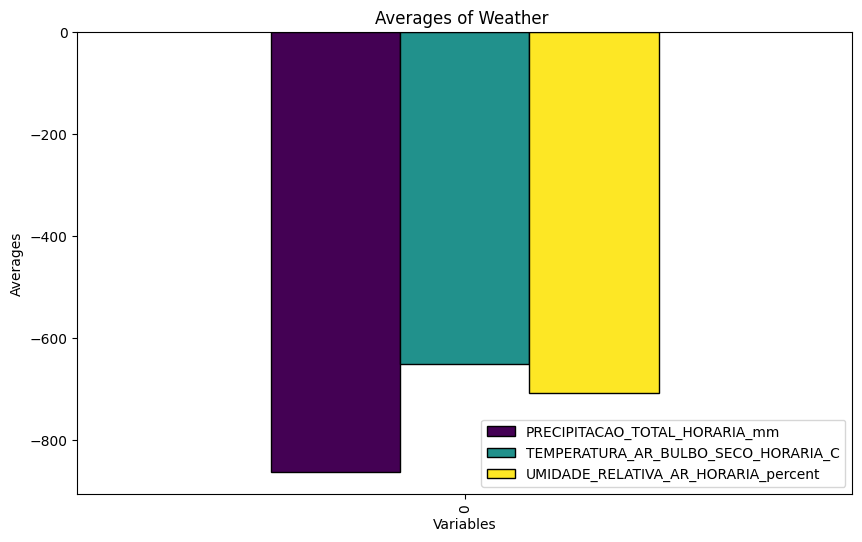

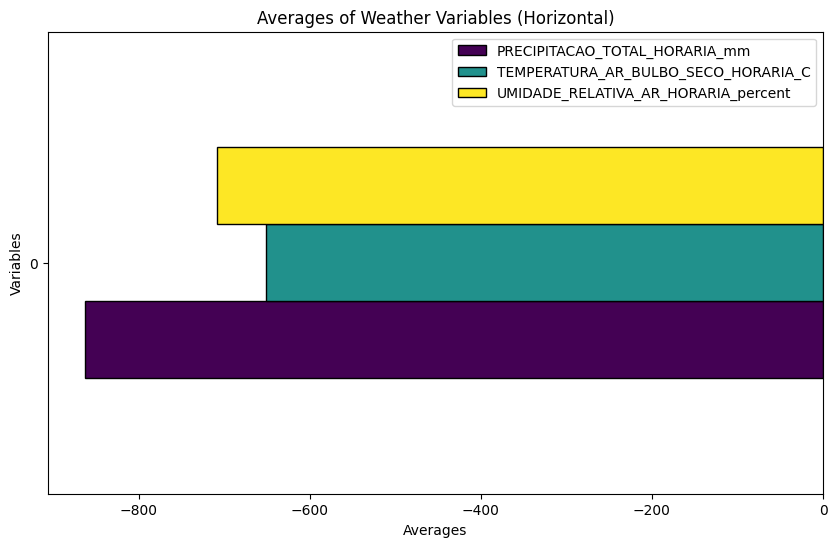

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

averages_pandas_df = averages_df.toPandas()


columns_to_plot = [
    'avg(PRECIPITACAO_TOTAL_HORARIA_mm)',
    'avg(TEMPERATURA_AR_BULBO_SECO_HORARIA_C)',
    'avg(UMIDADE_RELATIVA_AR_HORARIA_percent)'
]

variable_names = [col.split('(')[1].split(')')[0] for col in columns_to_plot]
ax = averages_pandas_df[columns_to_plot].plot(kind='bar', figsize=(10, 6), width=0.5, colormap='viridis', edgecolor='black')
plt.title('Averages of Weather ')
plt.xlabel('Variables')
plt.ylabel('Averages')

plt.legend(variable_names)

# Show the plot
plt.show()

ax = averages_pandas_df[columns_to_plot].plot(kind='barh', figsize=(10, 6), width=0.5, colormap='viridis', edgecolor='black')

plt.title('Averages of Weather Variables (Horizontal)')
plt.xlabel('Averages')
plt.ylabel('Variables')

plt.legend(variable_names)

# Show the plot
plt.show()


In [49]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

#'TEMPERATURA_AR_BULBO_SECO_HORARIA_C', 'PRECIPITACAO_TOTAL_HORARIA_mm', and 'UMIDADE_RELATIVA_AR_HORARIA_percent' are the columns
avg_temp_precip_rh = (
    southeast_df
    .groupBy()
    .agg(
        F.avg('TEMPERATURA_AR_BULBO_SECO_HORARIA_C').alias('avg_temperature'),
        F.avg('PRECIPITACAO_TOTAL_HORARIA_mm').alias('avg_precipitation'),
        F.avg('UMIDADE_RELATIVA_AR_HORARIA_percent').alias('avg_relative_humidity')
    )
)

# Show the result
avg_temp_precip_rh.show()


+------------------+------------------+---------------------+
|   avg_temperature| avg_precipitation|avg_relative_humidity|
+------------------+------------------+---------------------+
|-651.4797423900707|-862.9100386074799|   -708.3654361724201|
+------------------+------------------+---------------------+



In [50]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

# Assuming 'TEMPERATURA_AR_BULBO_SECO_HORARIA_C', 'PRECIPITACAO_TOTAL_HORARIA_mm', and 'UMIDADE_RELATIVA_AR_HORARIA_percent' are the columns
filtered_df = southeast_df.filter(
    (F.col('TEMPERATURA_AR_BULBO_SECO_HORARIA_C') >= 0) &
    (F.col('PRECIPITACAO_TOTAL_HORARIA_mm') >= 0) &
    (F.col('UMIDADE_RELATIVA_AR_HORARIA_percent') >= 0)
)

# Calculate averages
avg_temp_precip_rh = (
    filtered_df
    .groupBy()
    .agg(
        F.avg('TEMPERATURA_AR_BULBO_SECO_HORARIA_C').alias('avg_temperature'),
        F.avg('PRECIPITACAO_TOTAL_HORARIA_mm').alias('avg_precipitation'),
        F.avg('UMIDADE_RELATIVA_AR_HORARIA_percent').alias('avg_relative_humidity')
    )
)

# Show the result
avg_temp_precip_rh.show()


+------------------+-----------------+---------------------+
|   avg_temperature|avg_precipitation|avg_relative_humidity|
+------------------+-----------------+---------------------+
|22.024412310001882|0.147481694818779|    72.22615079940803|
+------------------+-----------------+---------------------+



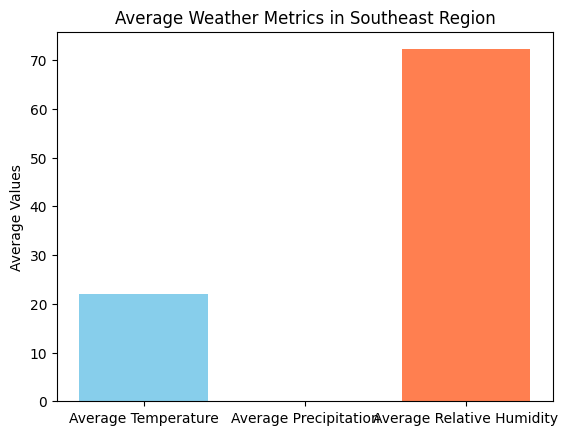

In [51]:
import matplotlib.pyplot as plt

# Extract average values from the DataFrame
avg_values = avg_temp_precip_rh.collect()[0]

# Extracting the average values
avg_temperature = avg_values['avg_temperature']
avg_precipitation = avg_values['avg_precipitation']
avg_relative_humidity = avg_values['avg_relative_humidity']

# Categories for the bar chart
categories = ['Average Temperature', 'Average Precipitation', 'Average Relative Humidity']

# Values for each category
values = [avg_temperature, avg_precipitation, avg_relative_humidity]

# Create a bar chart
plt.bar(categories, values, color=['skyblue', 'lightgreen', 'coral'])
plt.title('Average Weather Metrics in Southeast Region')
plt.ylabel('Average Values')
plt.show()


  state  total_precipitation
0    SP             578157.8
1    ES             166653.6
2    MG             969369.6
3    RJ             380392.0


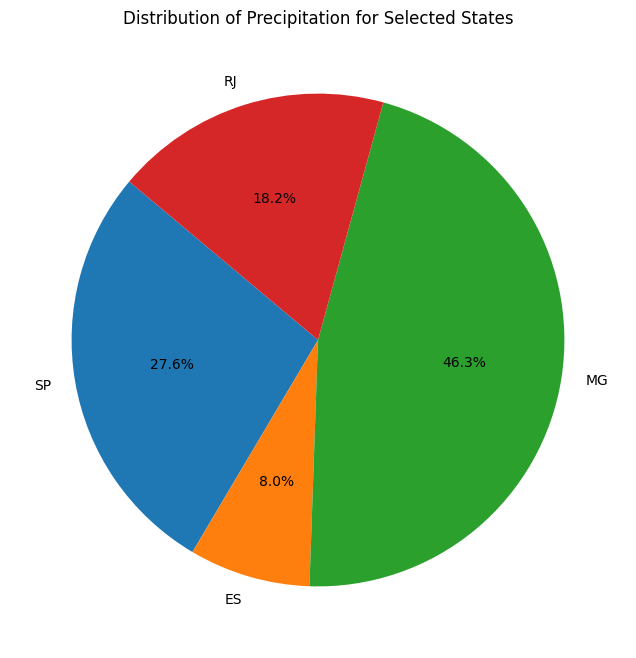

In [68]:
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

# Remove null values and negatives in the 'PRECIPITACAO_TOTAL_HORARIA_mm' column
filtered_df = southeast_df.filter((southeast_df['PRECIPITACAO_TOTAL_HORARIA_mm'].isNotNull()) & (southeast_df['PRECIPITACAO_TOTAL_HORARIA_mm'] >= 0))


selected_states = ['SP', 'ES', 'MG', 'RJ']

# Filter the DataFrame for the selected states
filtered_states_df = filtered_df.filter(filtered_df['state'].isin(selected_states))

# Group by state and calculate the total precipitation
precipitation_data = filtered_states_df.groupBy('state').agg(F.sum('PRECIPITACAO_TOTAL_HORARIA_mm').alias('total_precipitation'))

precipitation_pd = precipitation_data.toPandas()

print(precipitation_pd)

# Plot pie chart for the selected states
plt.figure(figsize=(10, 8))
plt.pie(precipitation_pd['total_precipitation'], labels=precipitation_pd['state'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Precipitation for Selected States')
plt.show()
